# How to make a Voxelised DNA Structure

DNA Structures are built from [L-string](https://en.wikipedia.org/wiki/L-system) seeded fractals.

L-strings and L-systems provide a grammar that can be used to generate a fractal. In this work,
Hilbert curves are generated that are then converted into cubic placement 'voxels' for use in
modelling.

In [1]:
import sys
from pathlib import Path

try:
    # The voxelisation library produces the cubic voxelisation that
    # can be used to build DNA
    from fractaldna.structure_models import voxelisation as v

    # The hilbert module produces and handles L-Strings
    from fractaldna.structure_models import hilbert as h
except (ImportError, ModuleNotFoundError):
    sys.path.append(str(Path.cwd().parent.parent.parent))
    from fractaldna.structure_models import voxelisation as v
    from fractaldna.structure_models import hilbert as h

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Producing L-Strings

The `hilbert` model encodes a few basic fractals which can create Hilbert curves. These are

```
h.X: n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->
h.A: B-F+CFC+F-D&FnD-F+&&CFC+F+B<<
h.B: A&FnCFBnFnDnn-F-Dn|FnB|FCnFnA<<
h.C: |Dn|FnB-F+CnFnA&&FA&FnC+F+BnFnD<<
h.D: |CFB-F+B|FA&FnA&&FB-F+B|FC<<
```

Reference to these are all stored in `hilbert.SUBSTITIONS`.

The L-String language works as follows:

- interpret `F` as DrawForward(1);
- interpret `+` as Yaw(90);
- interpret `-` as Yaw(-90);
- interpret `n` as Pitch(90);
- interpret `&` as Pitch(-90);
- interpret `>` as Roll(90);
- interpret `<` as Roll(-90);
- interpret `|` as Yaw(180);

To 'iterate' an L-String, replace any reference to a subsititution with its value.

In [2]:
print("h.X:", h.X)
print("h.A:", h.A)
print("h.B:", h.B)
print("h.C:", h.C)
print("h.D:", h.D)

print("\nh.X iterated once:", h.iterate_lstring(h.X))

h.X: n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->
h.A: B-F+CFC+F-D&FnD-F+&&CFC+F+B<<
h.B: A&FnCFBnFnDnn-F-Dn|FnB|FCnFnA<<
h.C: |Dn|FnB-F+CnFnA&&FA&FnC+F+BnFnD<<
h.D: |CFB-F+B|FA&FnA&&FB-F+B|FC<<

h.X iterated once: n<n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->Fn<n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->Fn<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->-Fn>>n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->Fn<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->&F+>>n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->Fn<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->-F>n<XFn<XFX-Fn>>XFX&F+>>XFX-F>X->->


### Drawing Fractals

The function `generate_path` will generate a list of XYZ-points for a fractal L-String as below,
which can then be plotted in matplotlib

In [3]:
print("Points seperated by 1 unit, no intermediate points")
print(h.generate_path("F", distance=1, n=1))
print("-")
print("Points seperated by 1 unit, 2 intermediate points")
print(h.generate_path("F", distance=1, n=2))

Points seperated by 1 unit, no intermediate points
[array([0, 0, 0]), array([1., 0., 0.])]
-
Points seperated by 1 unit, 2 intermediate points
[array([0, 0, 0]), array([0., 0., 0.]), array([1., 0., 0.])]


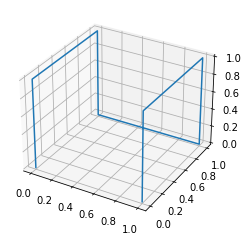

In [4]:
x_curve = np.array(h.generate_path(h.X, distance=1, n=10))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(x_curve[:, 0], x_curve[:, 1], x_curve[:, 2])

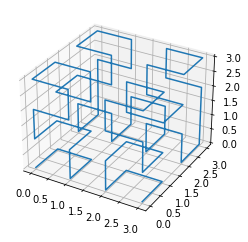

In [5]:
x_iterated = h.iterate_lstring(h.X)
x_curve2 = np.array(h.generate_path(x_iterated, distance=1, n=10))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(x_curve2[:, 0], x_curve2[:, 1], x_curve2[:, 2])

## Making voxelised representations.

The `voxelisation` model can convert the path of this curve to a voxelised representation, of straight
and curved boxes.

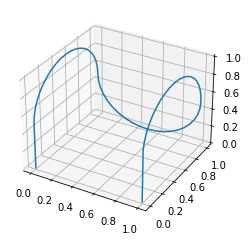

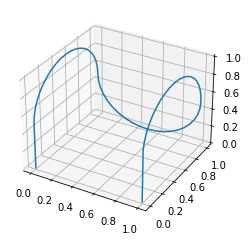

In [6]:
voxelised_fractal = v.VoxelisedFractal.fromLString(h.X)

# This can be plotted
voxelised_fractal.to_pretty_plot()

### Exporting large-scale structures to text.

In [7]:
# And this can be returned as a data frame, or as text
voxelised_fractal.to_frame()

,IDX,KIND,POS_X,POS_Y,POS_Z,EUL_PSI,EUL_THETA,EUL_PHI
0,0,straight,0.0,0.0,0.0,0.000000,-0.000000,0.000000
1,1,turn,0.0,0.0,1.0,0.000000,-0.000000,1.570796
2,2,turn,-0.0,1.0,1.0,-1.570796,1.570796,0.000000
3,3,turntwist,-0.0,1.0,0.0,3.141593,-0.000000,0.000000
4,4,turn,1.0,1.0,-0.0,-3.141593,-1.570796,0.000000
5,5,turntwist,1.0,1.0,1.0,0.000000,-0.000000,-1.570796
6,6,turn,1.0,0.0,1.0,1.570796,1.570796,0.000000
7,7,straight,1.0,-0.0,0.0,3.141593,-0.000000,0.000000
